In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

## Data Exploration

In [2]:
# Data setup load train and test datasets
DATA_PATH='../../data'
train_data = pd.read_csv(f'{DATA_PATH}/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Split train dataset into features 'X' and label 'y'
X = train_data.drop(['SalePrice'], axis=1) # Feature variables
y = train_data['SalePrice'] # Label variable

print(X.head())
print(y.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

In [4]:
# identify the number of rows and columns in the train dataset
data_shape = X.shape
print(f'the feature has {data_shape[0]} rows and {data_shape[1]} columns')

the feature has 1460 rows and 80 columns


In [5]:
# inspect the rows of the datasets
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
# check for the columns and the data types of each columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Basic statistics infomation of the train dataset
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [8]:
# check  for top columns with the most null values
X.isna().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
HalfBath           0
dtype: int64

## Data Cleaning

In [9]:
# Drop columns with count of Null Values  more than 140. This is to ensure that columns with Null Values greater are 10% of the dataset
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'Id']
X = X.drop(drop_cols, axis=1)


### Assumptions: Missing Data.
- Electrical describes the electrical system used, for missing values, I assume it is a 'Mixed system'.
- For GarageYrBlt, I assume the house has no Garage if Null, I fill with 1900
- Other Garage Attributes are filled with 'None'
- BsmtFinType2 and other Basement related  are filled with 'None'
- MasVnrArea is filled with 0 if missing

In [10]:
# Impute missing data
def missing_data(df, cols, fill):
    return df[cols].fillna(fill)

In [11]:
# Fill missing Electrical data
# train_data[['Electrical']] = train_data[['Electrical']].fillna('Mix') # fill 
cols = ['Electrical']
fill = 'Mix'
X[cols] = missing_data(X, cols, fill)


In [12]:
# 
cols = ['MasVnrArea']
fill = 0
X[cols] = missing_data(X, cols, fill)


In [13]:
# 
cols = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond']
fill = 'None'
X[cols] = missing_data(X, cols, fill)


In [14]:
# 
cols = ['GarageYrBlt']
fill = 1900
X[cols] = missing_data(X, cols, fill)


In [15]:
# check  if there are columns with  null values after data cleaning
X.isna().sum().max()

0

In [16]:
# identify the number of rows and columns in the train dataset after data cleaning
data_shape = X.shape
print(f'the dataset has {data_shape[0]} rows and {data_shape[1]} columns')

the dataset has 1460 rows and 72 columns


## Feature Selection and Engineering

In [17]:
# get all categorical columns
categorical_cols = X.select_dtypes(include='object').columns.to_list()
print(categorical_cols)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [18]:
# get all categorical columns
continuous_cols = X.select_dtypes(include=np.number).columns.to_list()
print(continuous_cols)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [19]:
# filter for train data for all categorical columns
train_data_categorical = X[categorical_cols]
train_data_categorical.sample(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
427,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
465,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
958,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
753,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
943,RL,Pave,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,P,WD,Normal
916,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,FuseA,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
593,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
953,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Min2,Attchd,RFn,TA,TA,Y,WD,Normal
1084,RL,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1247,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [20]:
# filter for train data for all continuous columns
train_data_continuous = X[continuous_cols]
train_data_continuous.sample(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
85,60,16059,8,5,1991,1992,284.0,0,0,1288,...,462,127,82,0,0,0,0,0,4,2006
1459,20,9937,5,6,1965,1965,0.0,830,290,136,...,276,736,68,0,0,0,0,0,6,2008
845,85,16647,5,5,1975,1981,0.0,1390,0,0,...,611,0,0,0,0,0,0,0,1,2007
856,80,10970,6,6,1978,1978,0.0,505,435,0,...,576,0,0,34,0,0,0,0,10,2008
1115,20,12085,8,5,2007,2007,328.0,1004,0,730,...,928,0,0,0,0,0,0,0,11,2007
99,20,9320,4,5,1959,1959,0.0,569,0,381,...,0,352,0,0,0,0,0,400,1,2010
106,30,10800,4,7,1885,1995,0.0,0,0,641,...,273,0,0,0,0,0,0,450,8,2007
1363,60,8499,6,5,2006,2007,0.0,0,0,616,...,432,0,36,0,0,0,0,0,3,2007
1287,20,36500,5,5,1964,1964,621.0,812,0,812,...,390,168,198,0,0,0,0,0,6,2006
267,75,8400,5,8,1939,1997,0.0,378,0,342,...,240,262,24,0,0,0,0,0,7,2008


In [21]:
# encoding categorical variables

enc = OrdinalEncoder()

# Fit the encoder to the data
enc.fit(X)

# Transform the dataframe
encoded_data = enc.transform(X)

# Convert the encoded data array into a DataFrame
encoded_X = pd.DataFrame(encoded_data, columns=X.columns)

# Sample the encoded DataFrame
encoded_X.head(10)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5.0,3.0,327.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,49.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,498.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,702.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,...,30.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,489.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,...,24.0,108.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,925.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,...,70.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
5,4.0,3.0,915.0,1.0,0.0,3.0,0.0,4.0,0.0,11.0,...,20.0,0.0,17.0,0.0,0.0,10.0,9.0,3.0,8.0,4.0
6,0.0,3.0,552.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,...,45.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
7,5.0,3.0,593.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,...,156.0,94.0,0.0,0.0,0.0,2.0,10.0,3.0,8.0,4.0
8,4.0,4.0,138.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,...,0.0,83.0,0.0,0.0,0.0,0.0,3.0,2.0,8.0,0.0
9,14.0,3.0,222.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,4.0


### Correlation of Categorical variables to SalesPrice

In [22]:
# Add salesprice to encoded Categorical variables
encoded_categorical_train = encoded_X[categorical_cols].join(y)
encoded_categorical_train.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,208500
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,3.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,181500
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,223500
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0,140000
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,250000
5,3.0,1.0,0.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,...,3.0,6.0,1.0,3.0,5.0,5.0,2.0,8.0,4.0,143000
6,3.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,...,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,307000
7,3.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,4.0,2.0,...,3.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0,200000
8,4.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,0.0,2.0,...,3.0,2.0,5.0,3.0,1.0,5.0,2.0,8.0,0.0,129900
9,3.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,3.0,6.0,1.0,2.0,2.0,5.0,2.0,8.0,4.0,118000


Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

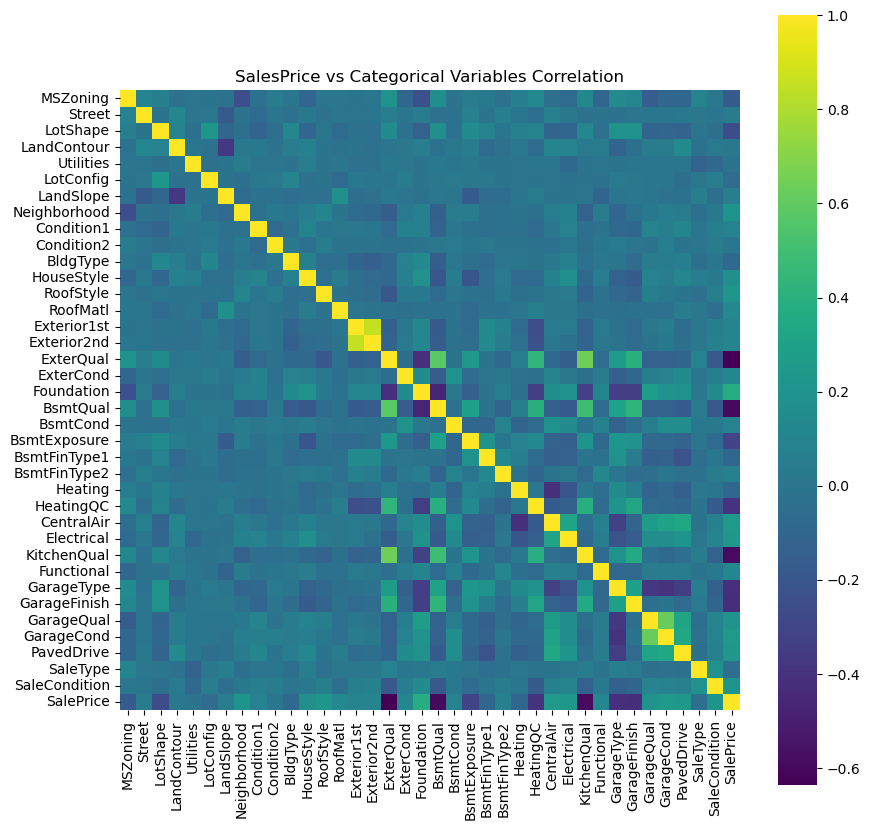

In [23]:
categorical_correlation = encoded_categorical_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(categorical_correlation, square=True, cmap="viridis")
plt.title("SalesPrice vs Categorical Variables Correlation")


In [24]:
# select the topmost 2 correlated categorical variable
cols = categorical_correlation.sort_values('SalePrice', ascending=False).head(3).index.to_list()
cols


['SalePrice', 'Foundation', 'CentralAir']

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

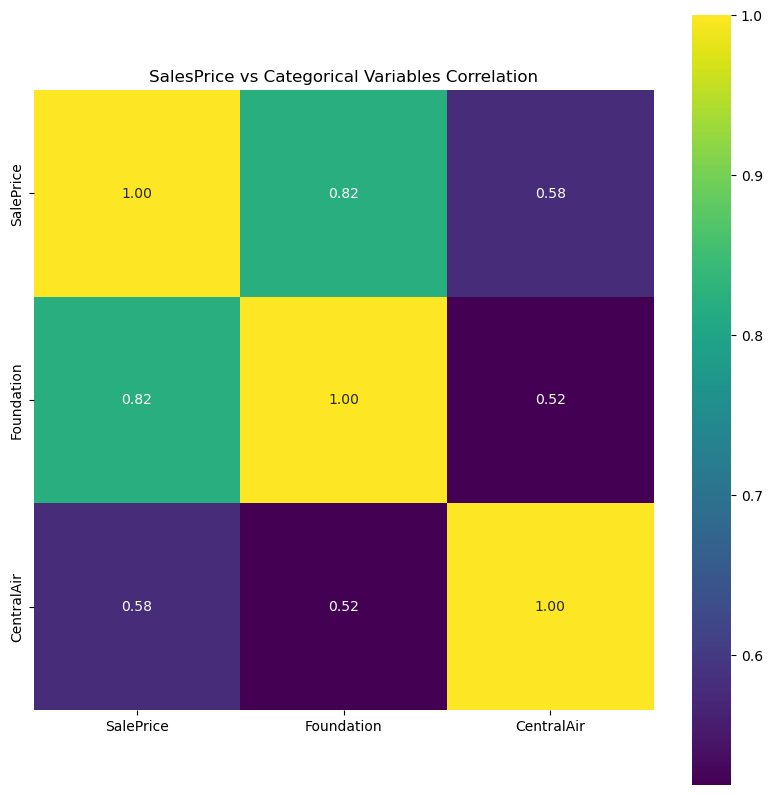

In [25]:
top_categorical_correlation = categorical_correlation[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(top_categorical_correlation, square=True, cmap="viridis", annot=True, fmt=".2f")
plt.title("SalesPrice vs Categorical Variables Correlation")

### Correlation of Contnuous variables to SalesPrice

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

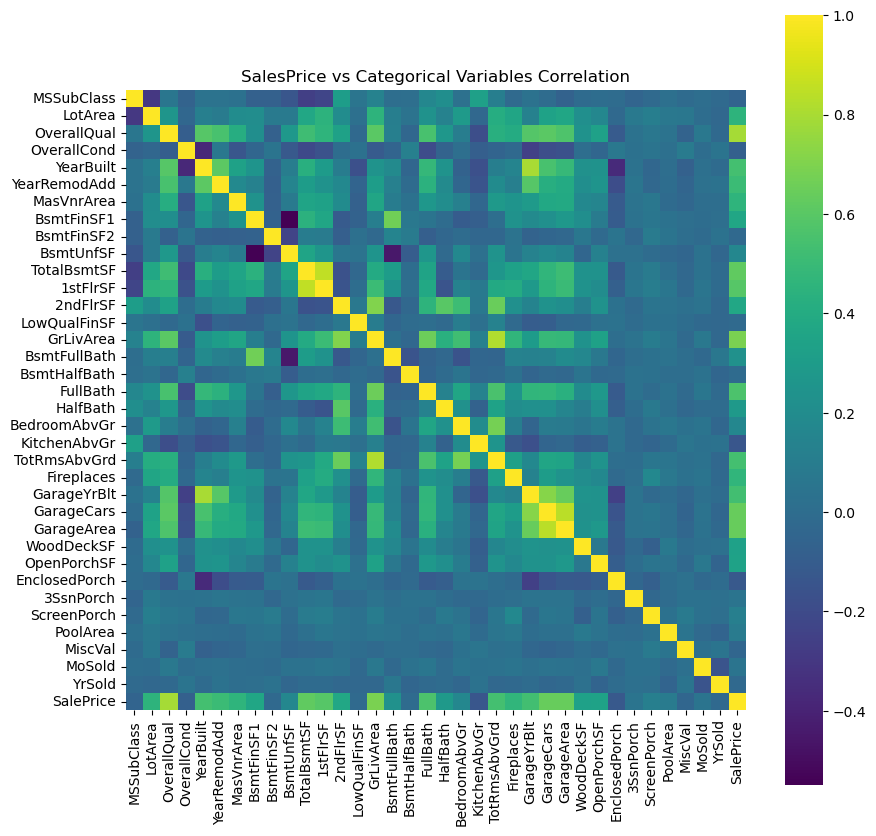

In [26]:
continuous_correlation = encoded_X[continuous_cols].join(y).corr()
plt.figure(figsize=(10,10))
sns.heatmap(continuous_correlation, square=True, cmap="viridis")
plt.title("SalesPrice vs Categorical Variables Correlation")



In [27]:
# select the topmost 7 correlated continuous variable
cols = continuous_correlation.sort_values('SalePrice', ascending=False).head(10).index.to_list()
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'TotRmsAbvGrd']

Text(0.5, 1.0, 'SalesPrice vs Categorical Variables Correlation')

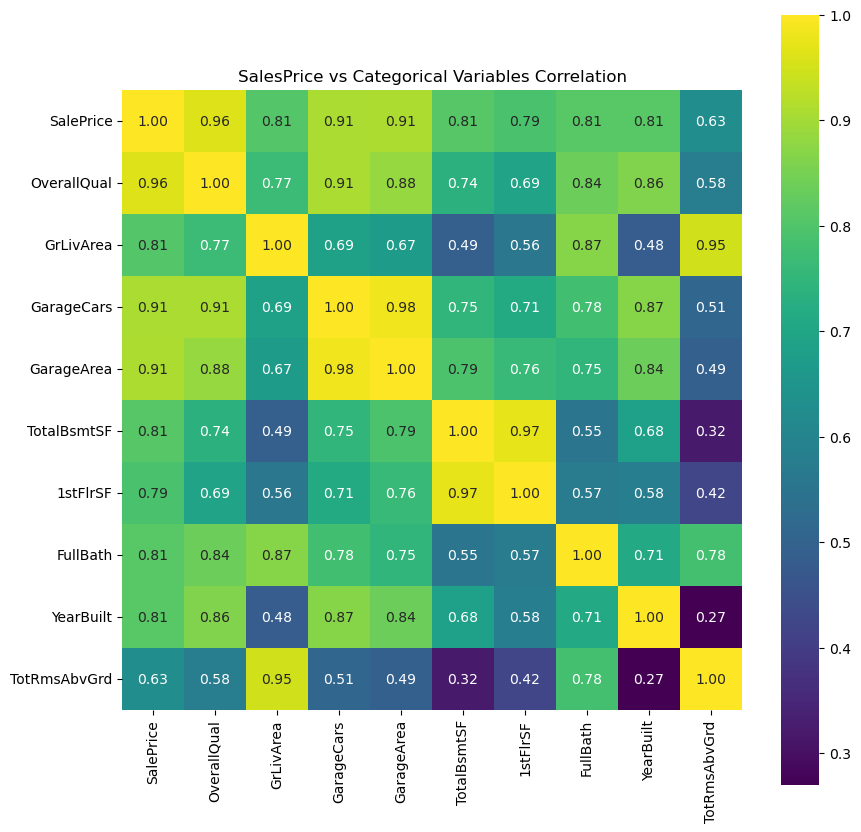

In [28]:
top_continuous_correlation = continuous_correlation[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(top_continuous_correlation, square=True, cmap="viridis", annot=True, fmt=".2f")
plt.title("SalesPrice vs Categorical Variables Correlation")

> The features of interest base on the correlation matrix of both categorical an d continuoius variables are:
- OverallQual
- GrLivArea
- TotalBsmtSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- Foundation
- CentralAir

## Modeling building

In [29]:
cols_of_interest = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Foundation', 'CentralAir'] 
df = encoded_X[cols_of_interest]
df.head(10)

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,6.0,531.0,179.0,2.0,6.0,104.0,2.0,1.0
1,5.0,259.0,441.0,2.0,4.0,77.0,1.0,1.0
2,6.0,570.0,214.0,2.0,4.0,102.0,2.0,1.0
3,6.0,536.0,117.0,1.0,5.0,19.0,0.0,1.0
4,7.0,734.0,370.0,2.0,7.0,101.0,2.0,1.0
5,4.0,315.0,140.0,1.0,3.0,94.0,5.0,1.0
6,7.0,520.0,633.0,2.0,5.0,105.0,2.0,1.0
7,6.0,701.0,346.0,2.0,5.0,74.0,1.0,1.0
8,6.0,565.0,237.0,2.0,6.0,35.0,0.0,1.0
9,4.0,146.0,269.0,1.0,3.0,42.0,0.0,1.0


In [30]:
# Scaling the feature variables
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [31]:
scaled_columns = scaler.transform(df)
scaled_columns[0]

array([ 0.65147924,  0.62198326, -0.61729831,  0.78974052,  0.91428906,
        1.0756586 ,  0.83559903,  0.26381257])

In [32]:
X_final = pd.DataFrame(data=scaled_columns, columns=cols_of_interest)

X_final.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813


In [33]:
df_final = X_final.join(y)
df_final.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir,SalePrice
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813,208500
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813,181500
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813,223500
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813,140000
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813,250000


### Model training

In [34]:
# Split dataset into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, random_state=42, test_size=0.25)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')



X_train: (1095, 8)
X_test: (365, 8)
y_train: (1095,)
y_test: (365,)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0

### Model Evaluation

In [37]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [38]:
compute_rmsle(y_test, y_pred)

0.62

### Test for dataframe equality

In [39]:
df_final.to_parquet(f'{DATA_PATH}/processed_df.parquet', index=False)

In [40]:
processed_df = pd.read_parquet(f'{DATA_PATH}/processed_df.parquet')
processed_df.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir,SalePrice
0,0.651479,0.621983,-0.617298,0.789741,0.914289,1.075659,0.835599,0.263813,208500
1,-0.071836,-0.534918,0.703496,0.789741,-0.318840,0.139539,-0.549162,0.263813,181500
2,0.651479,0.787863,-0.440856,0.789741,-0.318840,1.006316,0.835599,0.263813,223500
3,0.651479,0.643250,-0.929853,-1.026041,0.297725,-1.871384,-1.933923,0.263813,140000
4,1.374795,1.485406,0.345571,0.789741,1.530854,0.971645,0.835599,0.263813,250000


In [41]:
pd.testing.assert_frame_equal(processed_df, df_final)
print("OK 👌")

OK 👌


### Model Inference

In [56]:
# Load Test Data
test_data = pd.read_csv(f'{DATA_PATH}/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
# Load test dataset
df_test = test_data[cols_of_interest]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   TotalBsmtSF   1458 non-null   float64
 3   FullBath      1459 non-null   int64  
 4   TotRmsAbvGrd  1459 non-null   int64  
 5   YearBuilt     1459 non-null   int64  
 6   Foundation    1459 non-null   object 
 7   CentralAir    1459 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 91.3+ KB


In [61]:
#Preprocessing
df_test = df_test[cols_of_interest]
df_test.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,5,896,882.0,1,5,1961,CBlock,Y
1,6,1329,1329.0,1,6,1958,CBlock,Y
2,5,1629,928.0,2,6,1997,PConc,Y
3,6,1604,926.0,2,7,1998,PConc,Y
4,8,1280,1280.0,2,5,1992,PConc,Y


In [63]:
# Drop row with missing value
df_test = df_test.drop(df_test[df_test['TotalBsmtSF'].isna()].index)

In [64]:
# Fit the encoder to the data
enc.fit(df_test)

# Transform the dataframe
encoded_data = enc.transform(df_test)

# Convert the encoded data array into a DataFrame
encoded_test = pd.DataFrame(encoded_data, columns=df_test.columns)

# Sample the encoded DataFrame
encoded_test.head(10)

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,4.0,64.0,202.0,1.0,2.0,56.0,1.0,1.0
1,5.0,313.0,477.0,1.0,3.0,53.0,1.0,1.0
2,4.0,518.0,234.0,2.0,3.0,92.0,2.0,1.0
3,5.0,500.0,233.0,2.0,4.0,93.0,2.0,1.0
4,7.0,282.0,455.0,2.0,2.0,87.0,2.0,1.0
5,5.0,539.0,130.0,2.0,4.0,88.0,2.0,1.0
6,5.0,231.0,390.0,2.0,3.0,87.0,2.0,1.0
7,5.0,403.0,141.0,2.0,4.0,93.0,2.0,1.0
8,6.0,322.0,465.0,1.0,2.0,85.0,2.0,1.0
9,3.0,55.0,202.0,1.0,1.0,65.0,1.0,1.0


In [65]:
# Scaling Features
scaler.fit(encoded_test)

StandardScaler()

In [66]:
scaled_columns = scaler.transform(encoded_test)
scaled_columns[0]

array([-0.75237681, -1.3910336 , -0.52482408, -1.02944607, -0.92169781,
       -0.38530156, -0.53237971,  0.27281658])

In [67]:
test_final = pd.DataFrame(data=scaled_columns, columns=cols_of_interest)

test_final.head()

,OverallQual,GrLivArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,Foundation,CentralAir
0,-0.752377,-1.391034,-0.524824,-1.029446,-0.921698,-0.385302,-0.532380,0.272817
1,-0.055891,-0.351172,0.831710,-1.029446,-0.256762,-0.488981,-0.532380,0.272817
2,-0.752377,0.504939,-0.366973,0.772394,-0.256762,0.858852,0.834187,0.272817
3,-0.055891,0.429768,-0.371906,0.772394,0.408174,0.893411,0.834187,0.272817
4,1.337081,-0.480633,0.723187,0.772394,-0.921698,0.686052,0.834187,0.272817


In [70]:
y_pred = model.predict(test_final)

In [73]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])
y_pred.head()

,SalePrice
0,108652.170038
1,181606.211618
2,169060.859866
3,192192.629228
4,225859.563686
